## Import the libraries

In [271]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *

## Read the data

In [3]:
rider = pd.read_json('/Users/pallavibothra/Downloads/ultimate_challenge/ultimate_data_challenge.json')

In [4]:
rider

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2
49996,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0
49998,Astapor,2,2014-01-14,3.0,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5


## Data Description

In [5]:
rider.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [6]:
rider.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [7]:
rider.shape

(50000, 12)

In [204]:
rider.isnull().sum()

city                      0
trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
dtype: int64

In [9]:
rider['city'].value_counts()

Winterfell        23336
Astapor           16534
King's Landing    10130
Name: city, dtype: int64

## Imputing the missing values

In [205]:
no_rating_by_drivers = rider['avg_rating_by_driver'].isna()
no_rating_to_drivers = rider['avg_rating_of_driver'].isna()
no_phone = rider['phone'].isna()
rider[no_rating_by_drivers & no_rating_to_drivers & no_phone]

rider['avg_rating_of_driver'].fillna(rider['avg_rating_of_driver'].mean(), inplace = True)
rider['phone'].fillna(rider['phone'].mode()[0], inplace = True)
rider['avg_rating_by_driver'].fillna(rider['avg_rating_by_driver'].mean(), inplace = True)
rider.isnull().sum()

city                      0
trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
dtype: int64

## Percentage of active rider

In [73]:
rider['last_trip_date'] = rider['last_trip_date'].astype('datetime64')
last_day = rider['last_trip_date'].max()
one_month_prior = last_day - pd.to_timedelta(30, unit='d')
active_rider = rider[(rider['last_trip_date'] < last_day) & (rider['last_trip_date'] > one_month_prior)]

frac_active_rider = active_rider.shape[0]/rider.shape[0]
frac_active_rider

0.35524

~36% riders who signed up are still active. 

## Number of active rider per city

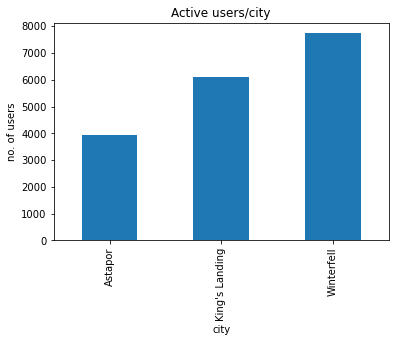

In [83]:

active_rider.groupby('city').agg('size').plot(kind = 'bar', title = 'Active users/city')
plt.ylabel('no. of users')
plt.show()

## Number of riders per month

Text(0.5, 0, 'month')

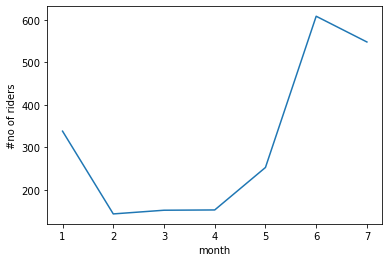

In [170]:


rides_per_month = rider.groupby(rider['last_trip_date'].dt.month).agg('size')
rides_per_month_last = pd.Series(rides_per_month.iloc[-1])
rides_per_month = rides_per_month.iloc[:-1]/30


rides_per_month = rides_per_month.append(rides_per_month_last, ignore_index = True)
rides_per_month.index = rides_per_month.index + 1
rides_per_month.plot()
plt.ylabel('#no of riders')
plt.xlabel('month')

## Factor affecting retention of riders

In [183]:
#surge_per_month = rider.groupby(rider['last_trip_date'].dt.month)['avg_surge'].agg('mean')
rider_paid_high_surge = rider[rider['avg_surge'] > 1.00]
rider_paid_no_surge = rider[rider['avg_surge'] == 1.00]
no_retention_after_surge = rider_paid_high_surge[(rider_paid_high_surge['last_trip_date'] < last_day) & (rider_paid_high_surge['last_trip_date'] > one_month_prior)]
no_retention_after_nosurge = rider_paid_no_surge[(rider_paid_no_surge['last_trip_date'] < last_day) & (rider_paid_no_surge['last_trip_date'] > one_month_prior)]

frac_ret_no_surge = no_retention_after_nosurge.shape[0]/no_retention_after_surge.shape[0]



1.0879275890443165

There is ~9% more retention in riders who paid no avg. surge. 

In [219]:
#plt.scatter(rider['avg_dist'], rider['avg_surge'])


last_trip_date
1    10147
2     4308
3     4568
4     4588
5     7585
6    18256
7      548
Name: avg_rating_of_driver, dtype: int64

## Mapping the depenedent variable

In [248]:
is_rider_retended = ((rider['last_trip_date'] < last_day) & (rider['last_trip_date'] > one_month_prior))

rider.loc[is_rider_retended, "retention"] = 1
rider.loc[~is_rider_retended, "retention"] = 0

In [256]:
model_rider =rider.drop(columns = ['signup_date', 'last_trip_date'])
model_rider = pd.get_dummies(model_rider, drop_first = True)
model_rider['ultimate_black_user'] = model_rider['ultimate_black_user'].astype('int')

In [299]:
model_rider

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retention,city_King's Landing,city_Winterfell,phone_iPhone
0,4,4.700000,1.10,15.4,1,46.2,3.67,5.0,1.0,1,0,1
1,0,5.000000,1.00,0.0,0,50.0,8.26,5.0,0.0,0,0,0
2,3,4.300000,1.00,0.0,0,100.0,0.77,5.0,0.0,0,0,1
3,9,4.600000,1.14,20.0,1,80.0,2.36,4.9,1.0,1,0,1
4,14,4.400000,1.19,11.8,0,82.4,3.13,4.9,0.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,5.000000,1.00,0.0,0,100.0,5.63,4.2,1.0,1,0,1
49996,1,4.601559,1.00,0.0,0,0.0,0.00,4.0,0.0,0,0,1
49997,0,5.000000,1.00,0.0,1,100.0,3.86,5.0,0.0,0,1,0
49998,2,3.000000,1.00,0.0,0,100.0,4.58,3.5,0.0,0,0,1


## Splitting the train and test set

In [273]:
y = model_rider['retention']
X = model_rider.drop(columns = 'retention')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.75)

## Classification Model

In [274]:
# Initialze the estimators
clf1 = RandomForestClassifier(random_state=42)
clf2 = SVC(probability=True, random_state=42)
clf3 = LogisticRegression(random_state=42)
clf4 = DecisionTreeClassifier(random_state=42)
clf5 = KNeighborsClassifier()
clf6 = MultinomialNB()
clf7 = GradientBoostingClassifier(random_state=42)


In [275]:
# Initiaze the hyperparameters for each dictionary
param1 = {}
param1['classifier__n_estimators'] = [10, 50, 100, 250]
param1['classifier__max_depth'] = [5, 10, 20]
param1['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param1['classifier'] = [clf1]

param2 = {}
param2['classifier__C'] = [10**-2, 10**-1, 10**0, 10**1, 10**2]
param2['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param2['classifier'] = [clf2]

param3 = {}
param3['classifier__C'] = [10**-2, 10**-1, 10**0, 10**1, 10**2]
param3['classifier__penalty'] = ['l1', 'l2']
param3['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param3['classifier'] = [clf3]

param4 = {}
param4['classifier__max_depth'] = [5,10,25,None]
param4['classifier__min_samples_split'] = [2,5,10]
param4['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param4['classifier'] = [clf4]

param5 = {}
param5['classifier__n_neighbors'] = [2,5,10,25,50]
param5['classifier'] = [clf5]

param6 = {}
param6['classifier__alpha'] = [10**0, 10**1, 10**2]
param6['classifier'] = [clf6]

param7 = {}
param7['classifier__n_estimators'] = [10, 50, 100, 250]
param7['classifier__max_depth'] = [5, 10, 20]
param7['classifier'] = [clf7]

In [293]:
pipeline = Pipeline([('classifier', clf1)])
params = [param1, param2, param3, param4, param5, param6, param7]


## Train the grid search model

In [278]:
%%time
# Train the grid search model
gs = GridSearchCV(pipeline, params, cv=3, n_jobs=-1, scoring='roc_auc').fit(X_train, y_train)


/Users/pallavibothra/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pallavibothra/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

/Users/pallavibothra/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pallavibothra/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

/Users/pallavibothra/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pallavibothra/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

/Users/pallavibothra/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pallavibothra/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

CPU times: user 2.26 s, sys: 322 ms, total: 2.59 s
Wall time: 6min 56s


In [279]:
gs.best_params_

{'classifier': GradientBoostingClassifier(max_depth=5, n_estimators=50, random_state=42),
 'classifier__max_depth': 5,
 'classifier__n_estimators': 50}

In [280]:
gs.best_score_

0.8372103837063688

In [284]:
print("Precision:",precision_score(gs.predict(X_test), y_test))
print("Recall:",recall_score(gs.predict(X_test), y_test))
print("ROC AUC Score:",roc_auc_score(gs.predict(X_test), y_test))

Precision: 0.6326347305389222
Recall: 0.7194416070820565
ROC AUC Score: 0.7644272341095277


## Train the randomized search model

In [294]:
rs = RandomizedSearchCV(pipeline, params, cv=3, n_jobs=-1, scoring='roc_auc').fit(X_train, y_train)


/Users/pallavibothra/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pallavibothra/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

In [295]:
rs.best_params_

{'classifier__n_estimators': 50,
 'classifier__max_depth': 5,
 'classifier__class_weight': {0: 1, 1: 5},
 'classifier': RandomForestClassifier(class_weight={0: 1, 1: 5}, max_depth=5, n_estimators=50,
                        random_state=42)}

In [296]:
rs.best_score_

0.8279384030048167

In [297]:
print("Precision:",precision_score(rs.predict(X_test), y_test))
print("Recall:",recall_score(rs.predict(X_test), y_test))
print("ROC AUC Score:",roc_auc_score(rs.predict(X_test), y_test))

Precision: 0.9528443113772455
Recall: 0.46154961749030127
ROC AUC Score: 0.6990175751530547


Let's consider non-retention as positive class and retention as negative class. In terms of business perspective, we would to try to increase the number of retention as much as possible. So, it is very important to predict the riders who are most likely to discontinue with the service. Then we can target them and give them some incentives, some extra offers so that they consider to stick with the service.  
Hence, the main purpose of the predictive model should be to reduce the numbers of false negative cases. That means, we would like to increase the recall. Hence, GradientBoosting(GB) Classifier can be chosen as predictive model in the present case since the performance metrics show the recall(0.72) with GB is higher than precision(0.61). 
